In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Amazon Review/

/gdrive/MyDrive/Amazon Review


In [4]:
ls

'Women Dresses Reviews Dataset .csv'


In [5]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/gdrive/MyDrive/Amazon Review'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/gdrive/MyDrive/Amazon Review/Women Dresses Reviews Dataset .csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
import seaborn as sns
from cycler import cycler
from IPython.display import display
import datetime

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

In [7]:
df=pd.read_csv("/gdrive/MyDrive/Amazon Review/Women Dresses Reviews Dataset .csv")

In [8]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
df.describe()

,s.no,age,clothing_id,alike_feedback_count,rating,recommend_index
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,918.118709,2.535936,4.196032,0.822362
std,6779.968547,12.279544,203.298980,5.702202,1.110031,0.382216
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000
25%,5871.250000,34.000000,861.000000,0.000000,4.000000,1.000000
50%,11742.500000,41.000000,936.000000,1.000000,5.000000,1.000000
75%,17613.750000,52.000000,1078.000000,3.000000,5.000000,1.000000
max,23485.000000,99.000000,1205.000000,122.000000,5.000000,1.000000


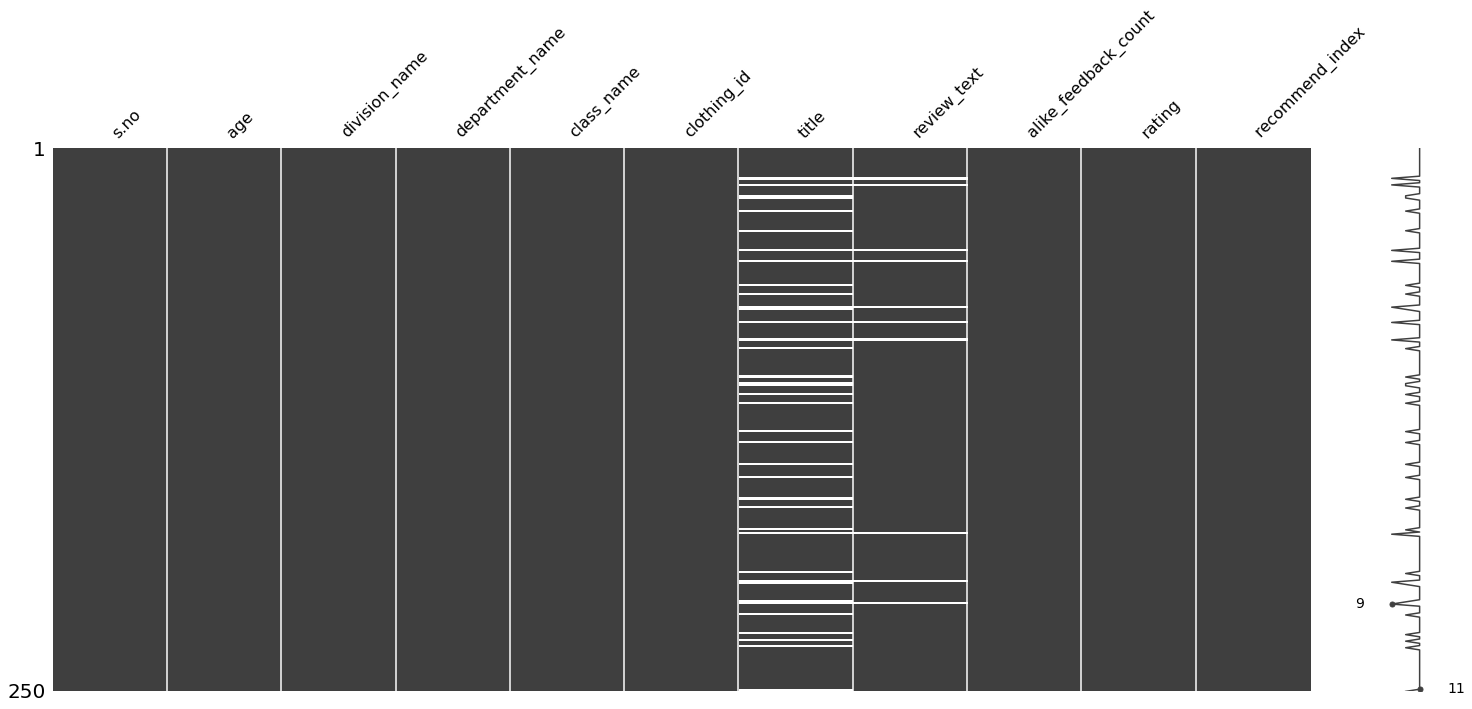

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

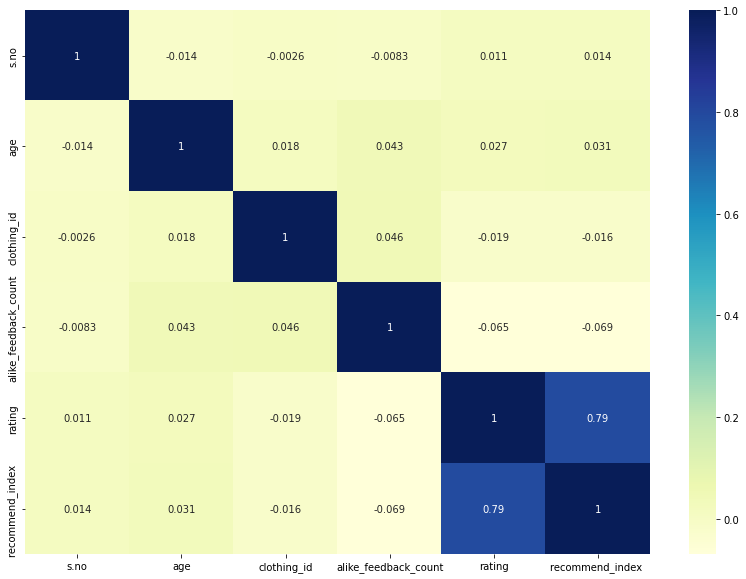

In [12]:
corr=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

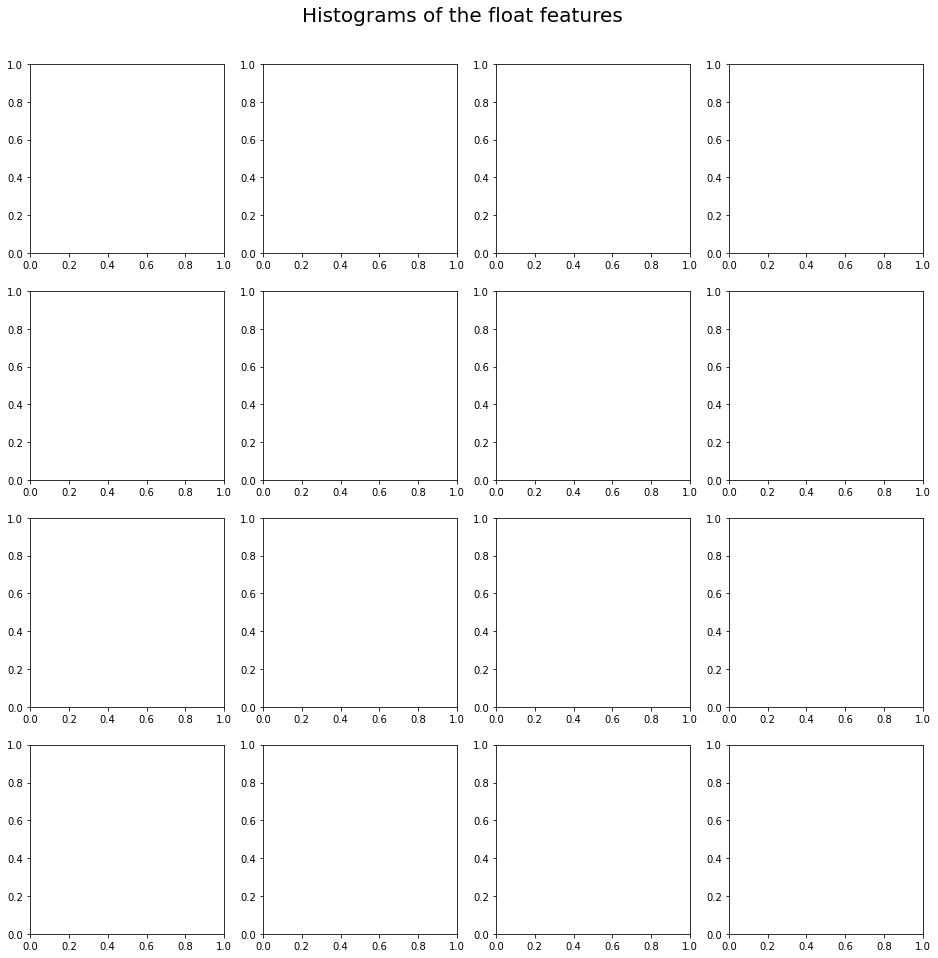

In [13]:
float_features = [f for f in df.columns if df[f].dtype == 'age']

# Training histograms
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for f, ax in zip(float_features, axs.ravel()):
    ax.hist(df[f], density=True, bins=100)
    ax.set_title(f'Train {f}, std={df[f].std():.1f}')
plt.suptitle('Histograms of the float features', y=0.93, fontsize=20)
plt.show()